# Palmer Penguins Project

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

This notebook is my project for the Principles of Data Analytics module of the [Higher Diploma in Science in Data Analytics given by ATU Galway-Mayo](https://www.gmit.ie/higher-diploma-in-science-in-computing-in-data-analytics).

It is an analysis of the Palmer Penguin dataset, which was compiled by Dr. Kristen Gorman at the Palmer Station in Antarctica. The dataset provides a comprehensive collection of measurements and demographic data for three species of penguins: Adelie, Chinstrap, and Gentoo. Collected from 2007 to 2009, this dataset includes features such as bill dimensions, flipper length, body mass and sex. It's widely used for research, education, and data analysis tasks, offering valuable insights into penguin biology, ecology, and conservation. The dataset is available [on github](https://allisonhorst.github.io/palmerpenguins/). 

I found this [video helpful](https://www.bing.com/videos/riverview/relatedvideo?q=palmer+penguins+dataset+variables&mid=55D478EACFBA66E11FEB55D478EACFBA66E11FEB&FORM=VIRE) in giving a overview of the dataset and some ideas for how to use it in my analysis. This video also pointed me to Dr. Gorman's [original research paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081) that used the dataset. The paper focuses on sexual dimorphism and it's relationship to sexual segregation in foraging niche.

## Summary of the Dataset

In [1]:
# Libraies I used in my analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Loading the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Summarizing the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## The Variables

In [20]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

There are two types of variables in the Palmer Penguin data set. There are quantitative variables, which are variables with numerical values, and qualitative variables, which are variables that represent categories or groups. The quantitative variables are the bill length, bill depth, flipper length and body mass and the qualitative variables are species, island and sex. 

I had to do some research on [which types of plots worked with the different types of variables](https://piktochart.com/blog/types-of-graphs/#areagraph). I was especially confused about [the difference between bar charts and histograms](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts#:~:text=Histograms%20visualize%20quantitative%20data%20or,bar%20charts%20display%20categorical%20variables).

I was interested in the sex differences between the penguins. My assumption was that the females would probably be smaller than the males becasue that it usually the case. But I was curious to see if my predjudice would be proven wrong. So I decided to look at the sex variable.

In [6]:
# Count the number of penguins of each sex.
df ['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

The sex variable is a qualitative variable and to do anything interesting with it I needed to plot it with a quantative variable. So I decided plot the mean mass of male vs female penguins with a bar chart.

## Bar chart

I found [this simple tutorial](https://www.w3schools.com/python/matplotlib_bars.asp) useful for understanding how to make bar charts. It looked straight forward enough but getting the dataset to make the bar chart was a bit more complicated. 

To get the mean mass of each sex I needed to seperate out the male and female data. [This site](https://datagy.io/filter-pandas/) gave a tutorial on how to filter Pandas dataframes. 

In [7]:
# First I converted all the data to numpy arrays
blen = df["bill_length_mm"]. to_numpy()
blepth = df["bill_depth_mm"]. to_numpy()
flen = df["flipper_length_mm"]. to_numpy()
mass = df["body_mass_g"]. to_numpy()

# Filtering the rows to a specific string in the data - in this case the strings are MALE and FEMALE
maledata = df[df['sex'] =='MALE']
femaledata = df[df['sex']=='FEMALE']

# Now need to convert to numpy arrays
malemass = maledata["body_mass_g"]. to_numpy()
femalemass = femaledata["body_mass_g"]. to_numpy() 

Next I needed to find the mean of malemass and femalemass. [This site](https://www.geeksforgeeks.org/numpy-mean-in-python/) showed me how.

In [8]:
femalemassmean = np.mean(femalemass)
malemassmean = np.mean(malemass)

Then I could create the bar chart using bar(). [This tutorial](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/) gave me the code to do this.

Text(0.5, 1.0, 'Mean Mass and Sex')

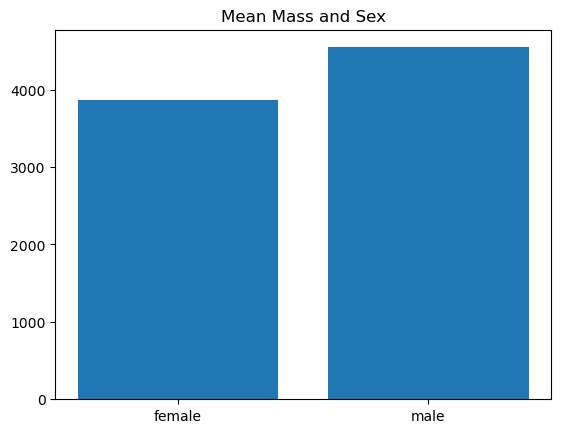

In [9]:
# I need to name the two bars on the x axis. These are the keys.
# The y axis is the mean. These are the values.

data = {'female':femalemassmean, 'male':malemassmean}
x = list(data.keys())
y = list(data.values())

plt.bar(x,y)
plt.title ('Mean Mass and Sex')

So it looked like my gender predudice was proven correct. It's always terrible when that happens! 

Also the bar chart was pretty disappointing given all the time I'd spent figuring out how to filter pandas dataframes. And I think that using a bar chart to show one value is bigger than another is only necessary when you really want to make a point about something. I could have just done this:

In [10]:
print(femalemassmean)
print(malemassmean)


3862.2727272727275
4545.684523809524


Amd I was also losing a load of the detail in the data by only plotting the mean mass. I wanted to find a way to keep all the mass values. I went looking for a neater way to compare the gender and mass data.

## Histogram 

Becasue I was interested in one quantitive variable (mass) I decdied to use a histogram, and to see if there were any clear differences in mass between the sexes I wanted to plot each gender with a different colour. I knew that this was possible becasue I could see that Alison Horst, the person who created the dateset, created similar histograms [here](https://allisonhorst.github.io/palmerpenguins/articles/examples.html).

It took a bit of research but I found [this tutorial](https://www.statology.org/seaborn-histogram-hue/) that showed me how I could use seaborn's [displot function](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create the histogram I wanted.

c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Mass')

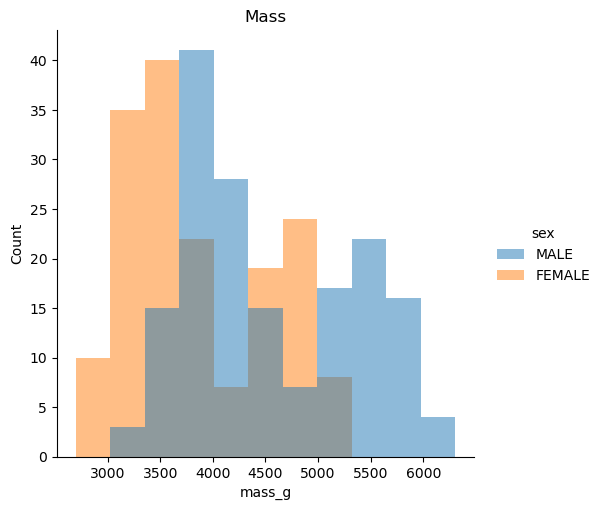

In [11]:
# In the displot function I can use the 'hue' parameter to plot the variable 'sex', which is a quantitative variable.
# Using 'linewidth' to remove lines between the bins to make plot look prettier.
sns.displot(data=df, x="body_mass_g", hue="sex", linewidth=0)

# Axis labels and titl
plt.xlabel('mass_g')
plt.title ('Mass')

So again it was immediately clear that the largest penguins are male and the smallest are female. However I thought it was interesting that the distribution of the values wasn't normal. With something like mass you'd assume that we'd be getting a bell curve.

But then I remembered that the dataset contained three species and if there were differences in mass between the species then that would explain why I wasn't getting a normal distribution. So I decided to introduce the species variable.


## Mass and Species

I would be able to see if there were any species differences in mass by making another histogram, changing the qualitative variable to species. I added a [kde plot](https://www.geeksforgeeks.org/seaborn-kdeplot-a-comprehensive-guide/) so I could better see the distribution curve.

c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


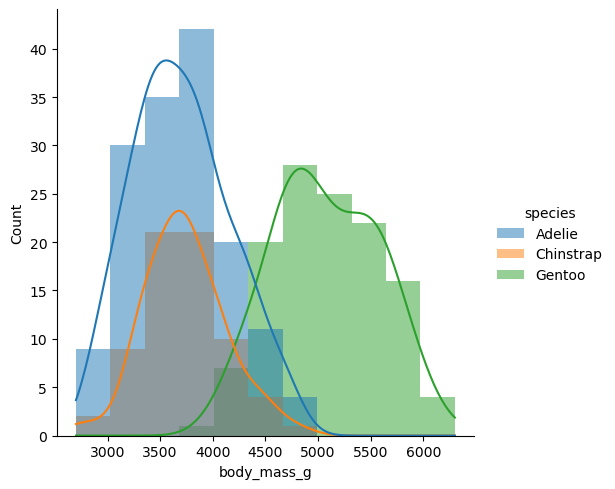

In [12]:
# Changing the hue to species to see if there are difference in mass between the species.
# Adding kde plot to better see distribution
sns.displot(data=df, x="body_mass_g", hue="species", linewidth=0, kde=True)

So Adelie and Chinstrap are about the same size with Gentoo being a good bit bigger. (Also I can see straightaway that there were fewer Chinstrap samples taken than Adelie or Gentoo.) Now that the data is seperated out by speices, the normal distribution of the mass variable is clearly visible. 

It would be interesting to see if the differences in male and female mass are similar across all the species. And if they aren't, then why aren't they? That could be a good starting point for better understanding the reasons behind sexual dimorphism.

So I decided to plot the mean mass of males and females for each species.

Text(0.5, 1.0, 'Mean Mass and Species')

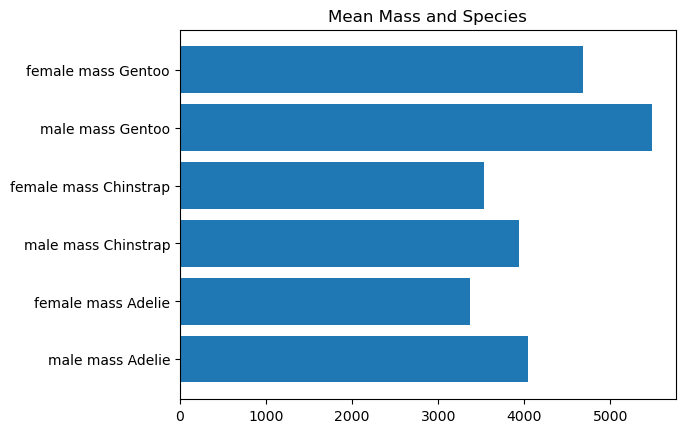

In [13]:
# Filtering dataframe by species
Adelie = df[df['species'] =='Adelie']
Gentoo = df[df['species'] =='Gentoo']
Chinstrap = df[df['species'] =='Chinstrap']

# Seperating the sex of each species
maleadelie = maledata[maledata['species'] =='Adelie']
femaleadelie = femaledata[femaledata['species']=='Adelie']
malechinstrap = maledata[maledata['species'] == 'Chinstrap']
femalechinstrap = femaledata[femaledata['species']=='Chinstrap']
malegentoo = maledata[maledata['species'] == 'Gentoo']
femalegentoo = femaledata[femaledata['species']=='Gentoo']

# Converting to numpy arrays
malemassadelie = maleadelie["body_mass_g"]. to_numpy()
femalemassadelie = femaleadelie["body_mass_g"]. to_numpy() 
malemasschinstrap = malechinstrap["body_mass_g"]. to_numpy()
femalemasschinstrap = femalechinstrap["body_mass_g"]. to_numpy() 
malemassgentoo = malegentoo["body_mass_g"]. to_numpy()
femalemassgentoo = femalegentoo["body_mass_g"]. to_numpy() 

# Getting the mean
malemassadeliemean = np.mean(malemassadelie)
femalemassadeliemean = np.mean(femalemassadelie)
malemasschinstrapmean = np.mean(malemasschinstrap)
femalemasschinstrapmean = np.mean(femalemasschinstrap)
malemassgentoomean = np.mean(malemassgentoo)
femalemassgentoomean = np.mean(femalemassgentoo)

# Now to do the barchart
data = {'male mass Adelie':malemassadeliemean, 'female mass Adelie':femalemassadeliemean,
        'male mass Chinstrap':malemasschinstrapmean, 'female mass Chinstrap':femalemasschinstrapmean,
        'male mass Gentoo':malemassgentoomean, 'female mass Gentoo':femalemassgentoomean,}

x = list(data.keys())
y = list(data.values())

# Making the bar chart horizontal so names will fit better
plt.barh(x,y)
plt.title ('Mean Mass and Species')


So was it worth spending a sunny afternoon indoors plotting all that? It wasn't, no. 

But I can see now that in all the species the females are smaller than the males. At first glance, it looks like they are smaller than the males by around the same amount. But looking closer I can see that there might be less of a difference with Chinstraps. So I decided to find the percentage difference. I found the code to do that [here](https://www.geeksforgeeks.org/program-to-find-the-percentage-of-difference-between-two-numbers/).

In [14]:
print ("Adeleie diff: ", (((femalemassadeliemean - malemassadeliemean) * 100) / malemassadeliemean))
print ("Chinstrap diff: ", (((femalemasschinstrapmean - malemasschinstrapmean) * 100) / malemasschinstrapmean))
print ("Gentoo diff: ", (((femalemassgentoomean - malemassgentoomean) * 100) / malemassgentoomean))

Adeleie diff:  -16.68501736258152
Chinstrap diff:  -10.453612096322574
Gentoo diff:  -14.6785551407215


So clearly there is less of a difference with the Chinstraps. But is this difference significant? I really don't know because I don't know how common or uncommon these sort of differences between species of penguins are.

So I read the abstract of [the research paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081) written by Kirsten Gorman, who created the penguin dataset, and she and the other authors took the difference to be significant. The study focused on sexual dimorphism and the theory that it may sometimes be caused by differences in feeding niches and they found that the differences in sexual dimorphism across the samples they collected supported this theory.

But what was interesting was that they saw Chinstraps as being MORE sexually dimorphic becasue, although the mass of the males and females were more similar, the size of their flippers and beaks were more divergent. And it would make sense to use flipper length and beak size as a marker of sexual dimorphism becasue if the males and females differed in their feedling habits, this could be an explanation for differences in their mass. That at certain times of year the females are fatter then the males and vice versa.

So I decided to try and plot the other variables on the dataset to see how they related to sex. To see for myself if the Chinstraps were more sexually dimorphic.

## Flipper Size, Beak size, Mass and Sex

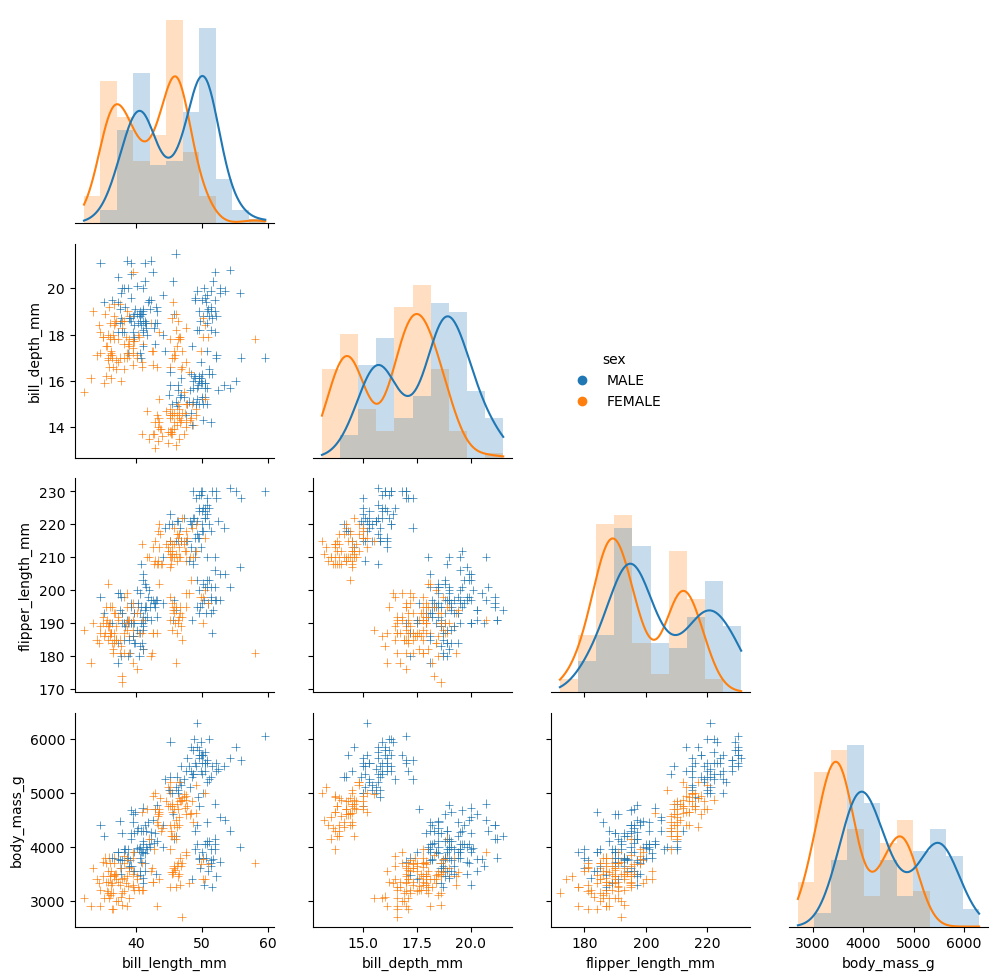

In [15]:
# Creating the grid
# Corner removes the empty axes
g = sns.PairGrid(df, hue="sex", corner=True)

# Creating scatterplots and histograms
g.map_lower(sns.scatterplot, marker="+",)
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)

# Creating legend
g.add_legend()
# Placing legend
g.legend.set_bbox_to_anchor((.61, .6))

How fancy is that! I just copied and pasted the code for this directly from this [Seaborn tutorial](http://seaborn.pydata.org/tutorial/introduction.html#lower-level-tools-for-building-figures). They made it even easier for me by using the Palmer Penguin dataset in their example.

Immediately, from looking at the histograms, it is clear that the females are smaller in size across all the variables, not just mass. Sex is also clustered in the scatterplots, with the males clustering around the larger datapoints. 

If you look at the body mass and flipper length axis on the bottom left, you can see what looks like three distinct groups, which I'm going to assume are the three different species. So knowing the Adelie and Chinstrap are similar in size, it looks like one of those species has a longer beak than the other. Given the fewer datapoints, I'm going to guess that it is the Chinstrap. Am I right?

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

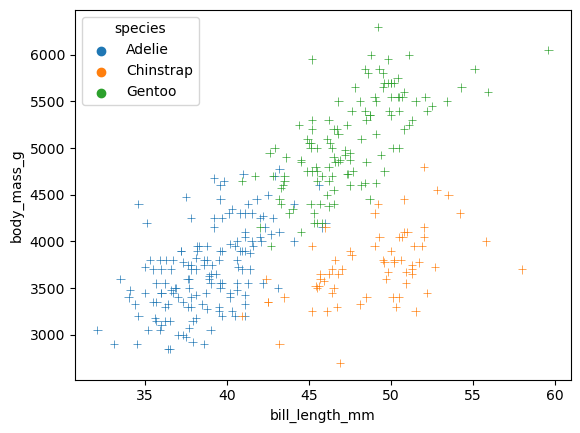

In [16]:
sns.scatterplot(df, y="body_mass_g", x="bill_length_mm", hue="species", marker="+")

Begod and I am!

So what I wanted to do was to see if the difference in size between male and female penguins across all the variables was greater with the Chinstraps.

To do this I needed seperate out the species again and look at the mean of each of the variables to compare the sexual dimorphism of each species. But I didn't want to spend ages filtering the dataframe to make disappointing bar charts. So I looked to see if there was another way to plot how correlated two variables were.

I remembered Ian's lectures on the Iris dataset and decided I would try to plot a best fit line, having some fuzzy idea that it had something to do with correlation.

## Best Fit Line

I did a bit more [googling](https://www.geeksforgeeks.org/line-of-best-fit/) I mean research that left me even more confused. But one thing I learnt was that I would need two quantative variables for a best fit line so I couldn't use the sex variable. Because I'd already shown that mass is strongly correlated to sex I used mass as the second quantative variable. I used Seaborn's [lmplot](http://seaborn.pydata.org/tutorial/regression.html) to create the best fit line. I was able to use 'hue' again to indicate each species.

c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Marcella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


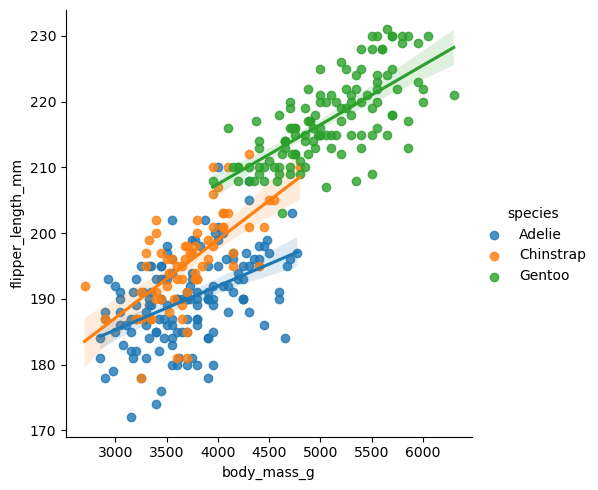

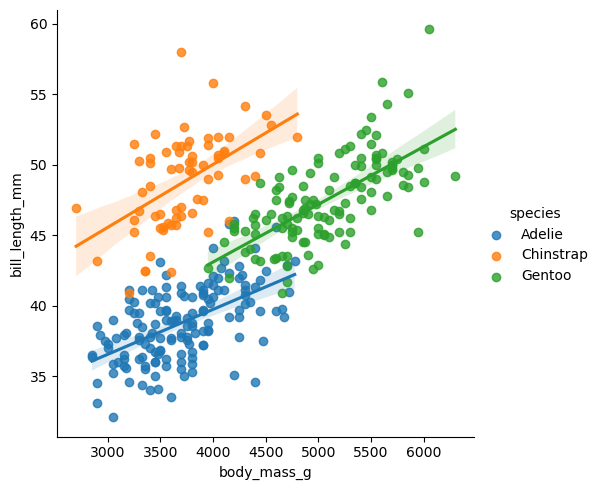

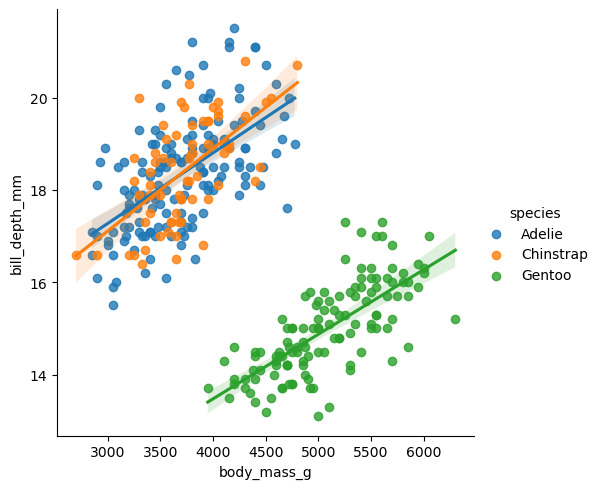

In [17]:
# Creating scatter plots for mass and other 3 variables with a line of best fit.
# Indicating species with 'hue'
sns.lmplot(x="body_mass_g", y="flipper_length_mm", data=df, hue="species")
sns.lmplot(x="body_mass_g", y="bill_length_mm", data=df, hue="species")
sns.lmplot(x="body_mass_g", y="bill_depth_mm", data=df, hue="species")

There seems to be a strong correlation between mass and the other variables for all three species. For the Chinstraps the best fit line is steeper for the bill depth and even more so for the flipper length. This points to a greater rate of change and would suggest that there is a greater difference between the bill depth and flipper length of the larger (male) and smaller (female) penguins. Or at least I think this is the case. 

But I still thought it would be better to be able to use the sex variable to see if sexual dimorphism was greater in Chinstraps. So I did a bit more research and found [this site](https://statisticsbyjim.com/graphs/box-plot/) that suggested using boxplots when comparing categorical values.

## Boxplot

<Axes: xlabel='species', ylabel='flipper_length_mm'>

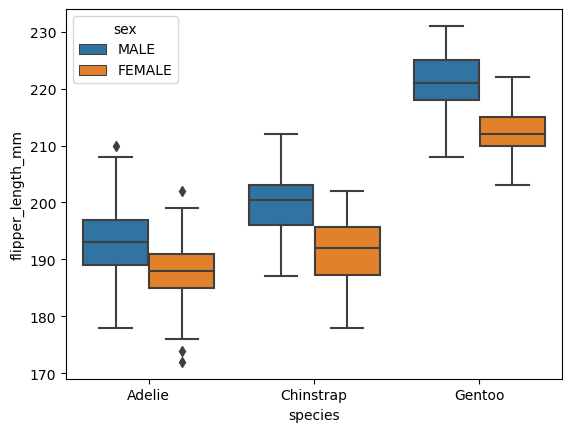

In [25]:
sns.boxplot(x=df["species"], y=df["flipper_length_mm"], hue=df["sex"])

I was left confused by this becasue it showed that there was a greater sexual dimorpohism in flipper length in Gentoos than in Chinstraps. I had thought that the greater steepness of the best fit line for Chinstraps in the previous scatter plot showed otherwise. 

But maybe the steepness has more to do with the spread of the values. It's clear from the box plot that there is a greater spread of values for the Chinstrap females than for the Gentoos because the box is bigger. So maybe the steepness of the best fit line showed that there was more divergence among the values as opposed to more divergence between the lowest and highest values. 

Also I used mass as a variable with the scatter plot and of course there is less sex difference in mass with the Chinstraps. So this would need to taken into account when reading the scatterplots.

<Axes: xlabel='species', ylabel='bill_depth_mm'>

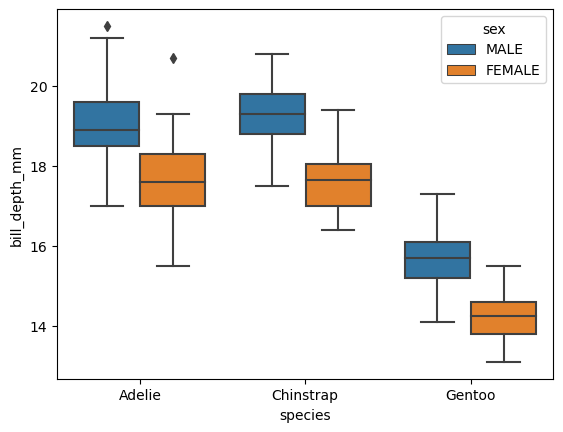

In [23]:
sns.boxplot(x=df["species"], y=df["bill_depth_mm"], hue=df["sex"])

Likewise with bill depth, the Chinstraps and Gentoos are more dimorphic with the Adelie being less so. But so far I can't see how Chinstraps are the most sexually dimorphic. They seem to be behind Gentoos.

<Axes: xlabel='species', ylabel='bill_length_mm'>

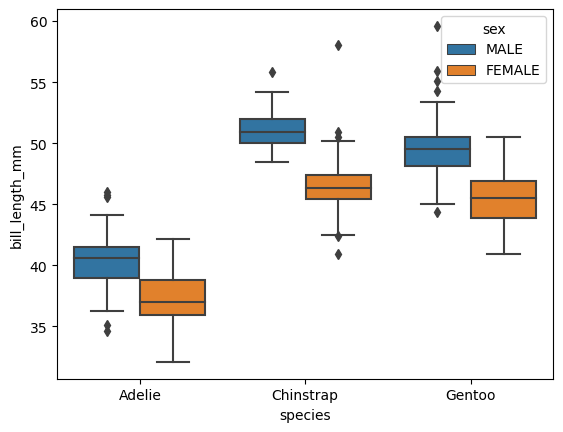

In [24]:
sns.boxplot(x=df["species"], y=df["bill_length_mm"], hue=df["sex"])

So bill length is the only variable where it seems the Chinstrap's are more sexually dimorphic. Interesting too that there is less differnce between individuals. So bill depth varies more than bill length. 

Also knowing that Gentoo are much bigger in mass it's funny that the Chinstraps have the longest beaks. They're wee little fellas waddling aroung with massive honkers.

## Conclusion

So I conclude that I know even less about sexual dimorphism in penguins than I did when I started. One of the great things about assumptions is how straightforward they are. Information just confuses everything.

I don't understand why the scientists who created the dataset saw the Chinstraps as the most sexually dimorphic. But that is probably becasue I am reading the plots wrong. I trust the experts on this.

It's also interesting to note that in birds the females have ZW chromosomes, so they are the heterogametic sex, while the males are the homogametic sex with ZZ chromosomes. So the oposite of how it is in humans. The male and female designation is based on the 
size of the gamete - that the birds with the ZW chromosomes produce the egg, which is bigger than the sperm produced by the birds with ZZ chromosomes. 

There was probably a good reason to choose gamate size over chromosome arrangement to define the difference in sex, but it's interesting that the definition of male and female had to be decided by someone and I suppose this is what is meant when people say that science is always inbedded in a culture. If it was decided that the sex designation was based on chromosomes rather than gamete size, then we would not consider male birds to be males who have heterogametic chromosones, but rather males who lay eggs. And in that case, female penguins would be bigger than male penguins and they'd the ones opening the pickle jars!

# End